# Imports

In [1]:
#general purpose packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import emoji
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import torch
import urllib
import csv

#wordcloud and Plotting
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from collections import Counter

import os
for dirname, _, filenames in os.walk('C:/Users/deeks/Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deeks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:/Users/deeks/Downloads/archive\0401_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0402_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0403_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0404_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0405_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0406_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0407_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0408_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0409_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0410_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0411_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0412_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0413_UkraineCombinedTweetsDeduped.csv
C:/Users/deeks/Downloads/archive\0414_UkraineCombinedTweetsDeduped.csv
C:/Use

In [2]:
#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<Figure size 432x288 with 0 Axes>

# Exploratory Data Analysis

First we load the entire Dataset to do some Exploratory Data Analysis

In [3]:
#Load all the values for Exploratory Data Analysis (EDA)
csv_collection = []
for dirname, _, filenames in os.walk('C:/Users/deeks/Downloads/archive'):
    for filename in filenames:
        fullpath= os.path.join(dirname, filename)
        csv_collection.append(fullpath)
    
df = pd.read_csv(csv_collection.pop(), index_col=0)
for data in csv_collection:
    try:
        tmp = pd.read_csv(data, compression = 'gzip', index_col=0)
    except:
            tmp = pd.read_csv(data, index_col = 0)
            df = pd.concat([df, tmp], axis=0)

Now lets look at the columns and datatypes of our Dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482880 entries, 343910224 to 1428096630423638017
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   username        482880 non-null  object 
 1   acctdesc        378289 non-null  object 
 2   location        286552 non-null  object 
 3   following       482880 non-null  int64  
 4   followers       482880 non-null  int64  
 5   totaltweets     482880 non-null  int64  
 6   usercreatedts   482880 non-null  object 
 7   tweetid         482880 non-null  float64
 8   tweetcreatedts  482880 non-null  object 
 9   retweetcount    482880 non-null  int64  
 10  text            482880 non-null  object 
 11  hashtags        482880 non-null  object 
 12  language        482880 non-null  object 
 13  coordinates     171 non-null     object 
 14  favorite_count  482880 non-null  int64  
 15  extractedts     482880 non-null  object 
 16  userid          22880 non-null   fl

Which columns do not have values populated?

In [5]:
#Columes that have NaN Values
df.isna().sum().sort_values(ascending=False)

coordinates       482709
userid            460000
location          196328
acctdesc          104591
text                   0
extractedts            0
favorite_count         0
language               0
hashtags               0
username               0
retweetcount           0
tweetid                0
usercreatedts          0
totaltweets            0
followers              0
following              0
tweetcreatedts         0
dtype: int64

We can see the location is not populated in all tweets. We will clean this later.

Now we are plotting the **number of tweets** based on the **location** of the tweet

<AxesSubplot:>

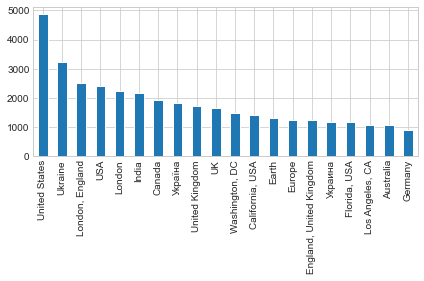

In [6]:
df.location.value_counts()[:20].plot.bar()

We will do some **Hastag Analysis**

In [7]:
!pip install Unidecode
from unidecode import unidecode
def evaluate_hashtags(x):
    hashtags = []
    
    a = eval(str(x))
    
    for item in a:
        hashtags.append((str(unidecode(item["text"])).lower()))
        hashtags = list(set(hashtags))
        
    return hashtags

In [8]:
masterlist = []
hashtagsListCollection = df["hashtags"].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        masterlist.append(hashtag)
        
#get top 20 hashtags
topXItem = 20
from collections import Counter

x = Counter(masterlist)

topXItemList = x.most_common(topXItem)

In [9]:
df_hash = pd.DataFrame(topXItemList)
df_hash.columns =['Hashtag','Tweets']
df_hash

Hashtag  Tweets
0              ukraine  174377
1               russia   71334
2                putin   34995
3     standwithukraine   26667
4              russian   25422
5             mariupol   22293
6                 kyiv   16779
7                 nato   13231
8     ukrainerussiawar   12453
9            ukrainian   11234
10          ukrainewar   10672
11               bucha    9978
12           stopputin    8951
13          stoprussia    8462
14    russiaukrainewar    7326
15   ukrainerussianwar    7206
16             kharkiv    6905
17           anonymous    6360
18  ukraineunderattack    5793
19        slavaukraini    5732

<AxesSubplot:xlabel='Hashtag'>

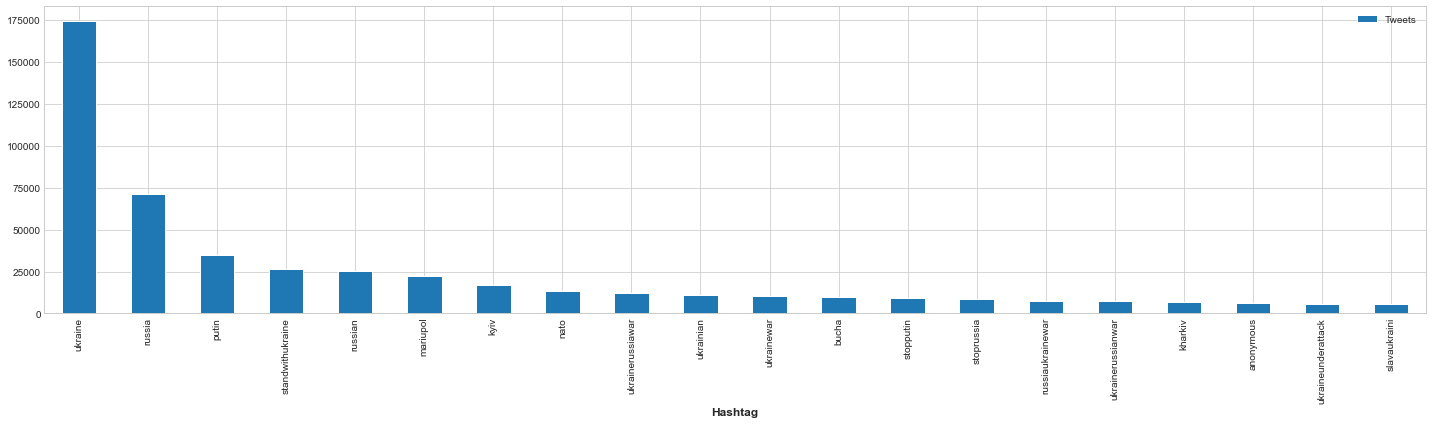

In [10]:
plt.rcParams["figure.figsize"] = [20, 6]
df_hash.plot.bar(x='Hashtag', y='Tweets', rot=90)

# Loading Sample Data for Sentiment Analysis
Due to resource limitations we can not load all the Tweets and will load only a sample of 2500 per day.

Thanks to the EDA we were able to find that certain rows like the location are not always filled out. We do not load them into our dataset for the Sentiment analysis.
We also drop duplicates and focus on english Tweets only. 
* no duplicate "text" in Tweets
* drop tweets without location
* only english tweets
* 2.5k tweets/day

In [11]:
df = 0
#load all the Names of the CSVs
csv_collection = []
for dirname, _, filenames in os.walk('C:/Users/deeks/Downloads/archive'):
    for filename in filenames:
        fullpath= os.path.join(dirname, filename)
        csv_collection.append(fullpath)
    
#read first CSV
df = pd.read_csv(csv_collection.pop(), index_col = 0)
#remove duplicate Tweets
df.drop_duplicates(subset='text', inplace=True)
#drop Tweets where location is empty
df = df.dropna(subset=['location'])
#only keep English Tweets
df = df[df["language"] == "en"].sample(2500,replace=True)
#df = df[df["language"] == "en"]

#process rest of csv
for data in csv_collection:
    tmp = pd.read_csv(data, index_col=0)
    # drop duplicates
    tmp.drop_duplicates(subset='text', inplace=True)
    # drop location emtpy
    tmp = tmp.dropna(subset=['location'])
    # drop other languages
    tmp = tmp[tmp["language"] == "en"].sample(2500,replace=True)
    #tmp = tmp[tmp["language"] == "en"]
    #concat
    df = pd.concat([df, tmp], axis=0)


Quickly reviewing the contents of our sample Dataset

In [12]:
## describe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 3252151371 to 182653958
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   username        120000 non-null  object 
 1   acctdesc        110325 non-null  object 
 2   location        120000 non-null  object 
 3   following       120000 non-null  int64  
 4   followers       120000 non-null  int64  
 5   totaltweets     120000 non-null  int64  
 6   usercreatedts   120000 non-null  object 
 7   tweetid         120000 non-null  float64
 8   tweetcreatedts  120000 non-null  object 
 9   retweetcount    120000 non-null  int64  
 10  text            120000 non-null  object 
 11  hashtags        120000 non-null  object 
 12  language        120000 non-null  object 
 13  coordinates     75 non-null      object 
 14  favorite_count  120000 non-null  int64  
 15  extractedts     120000 non-null  object 
 16  userid          5000 non-null    float64
dty

following     followers   totaltweets       tweetid   retweetcount  \
count  120000.000000  1.200000e+05  1.200000e+05  1.200000e+05  120000.000000   
mean     2704.081708  2.395535e+04  7.206303e+04  1.506421e+18     190.660700   
std      8772.414513  3.697254e+05  2.233723e+05  5.025962e+15    2247.704365   
min         0.000000  0.000000e+00  1.000000e+00  1.497725e+18       0.000000   
25%       238.000000  1.540000e+02  3.347000e+03  1.502071e+18       0.000000   
50%       836.000000  7.160000e+02  1.609500e+04  1.506420e+18       2.000000   
75%      2654.000000  2.759000e+03  6.448325e+04  1.510769e+18      26.000000   
max    568157.000000  1.760661e+07  4.701053e+07  1.515118e+18  147623.000000   

       favorite_count        userid  
count   120000.000000  5.000000e+03  
mean         0.306667  2.468949e+17  
std          4.188530  4.941896e+17  
min          0.000000  7.670000e+02  
25%          0.000000  1.648981e+07  
50%          0.000000  2.047989e+07  
75%          0.000000  2.740833e+09  
max        754.000000  1.507710e+18

Lets look at the first few tweet contents.

In [13]:
df.head()

username  \
3252151371                 DeOriosco   
394637051                    PAAhlin   
3225032097               bmilakovsky   
1166381062248783874  forcemultstevea   
1433304133                WorldToBe1   

                                                              acctdesc  \
3252151371                                                     Biologo   
394637051            Demokrati är mer än att rösta vart fjärde år. ...   
3225032097           Mostly tweet about socio-economics of Donbas c...   
1166381062248783874  AI startup advisor 'force multiplier' who shap...   
1433304133           Advocate of Social Solidarity,Altruist,Indepen...   

                                          location  following  followers  \
3252151371           Asylum Roud. Derry. N.IRELAND        140        117   
394637051                                Stockholm       4961       2690   
3225032097                  Severodonetsk, Ukraine        240       1242   
1166381062248783874                     Olympia WA        999        798   
1433304133                                  London      11697      10684   

                     totaltweets               usercreatedts       tweetid  \
3252151371                 27952  2015-05-13 17:22:48.000000  1.509518e+18   
394637051                  65685  2011-10-20 11:49:46.000000  1.509320e+18   
3225032097                   967  2015-04-30 19:10:39.000000  1.509631e+18   
1166381062248783874       108374  2019-08-27 16:05:01.000000  1.509342e+18   
1433304133                  8911  2013-05-16 14:55:57.000000  1.509662e+18   

                                 tweetcreatedts  retweetcount  \
3252151371           2022-03-31 13:10:21.000000           694   
394637051            2022-03-31 00:03:16.000000          1815   
3225032097           2022-03-31 20:38:14.000000             1   
1166381062248783874  2022-03-31 01:28:29.000000             0   
1433304133           2022-03-31 22:41:15.000000             0   

                                                                  text  \
3252151371           #Ukraine: More Russian losses in Trostianets, ...   
394637051            #Germany will soon supply #Ukraine with arms w...   
3225032097           I wrote about #Donbas front in #Russia's invas...   
1166381062248783874  Alpha 1, a Ukrainian Foreign Legion team of mu...   
1433304133           Countries #Refugees from #Ukraine Go to, and t...   

                                                              hashtags  \
3252151371           [{'text': 'Ukraine', 'indices': [15, 23]}, {'t...   
394637051            [{'text': 'Germany', 'indices': [14, 22]}, {'t...   
3225032097           [{'text': 'Donbas', 'indices': [14, 21]}, {'te...   
1166381062248783874  [{'text': 'StopRussianAggression', 'indices': ...   
1433304133           [{'text': 'Refugees', 'indices': [10, 19]}, {'...   

                    language coordinates  favorite_count  \
3252151371                en         NaN               0   
394637051                 en         NaN               0   
3225032097                en         NaN               1   
1166381062248783874       en         NaN               0   
1433304133                en         NaN               0   

                                    extractedts  userid  
3252151371           2022-03-31 13:15:10.646730     NaN  
394637051            2022-03-31 00:13:55.159476     NaN  
3225032097           2022-03-31 20:43:56.927136     NaN  
1166381062248783874  2022-03-31 02:26:59.538833     NaN  
1433304133           2022-03-31 22:54:28.892332     NaN

We have 120k unique english tweets.
They are divided equally across the daterange of 27.Feb to 15.Apr. This will ensure we get a equal distribution of our sentiments.

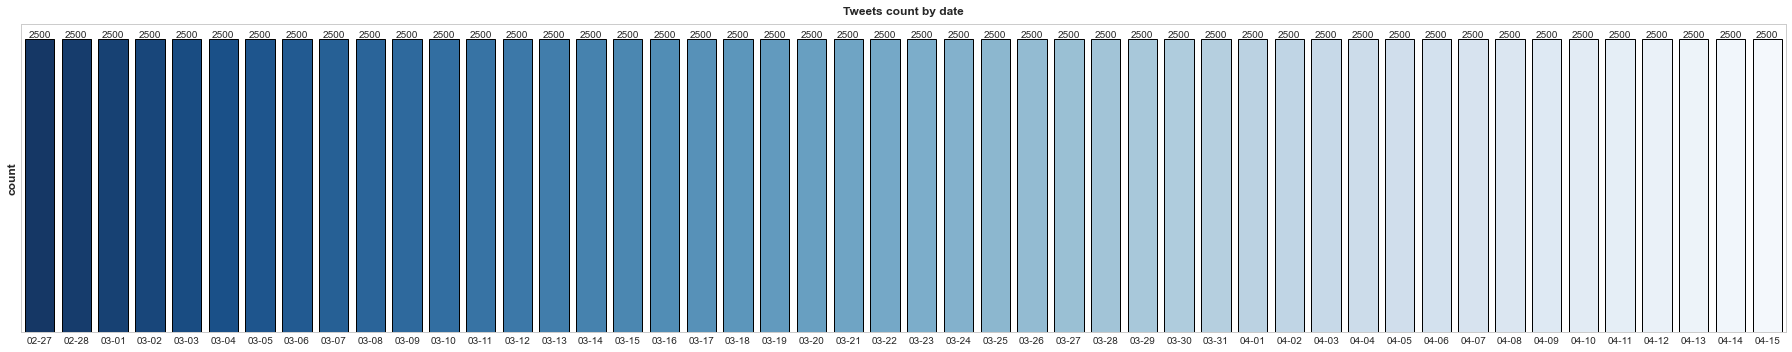

In [14]:
#We convert the date column 'TweetAt' to pandas datetime format to improve its usability in the further analysis.
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'])
#Tweets count by date
tweets_per_day = df['tweetcreatedts'].dt.strftime('%m-%d').value_counts().sort_index().reset_index(name='counts')
#plot
plt.figure(figsize=(25,5))
ax = sns.barplot(x='index', y='counts', data=tweets_per_day,edgecolor = 'black',ci=False, palette='Blues_r')
plt.title('Tweets count by date')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

Lets look at the most common words in our dataset.

In [15]:
#most common words
temp = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in temp for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['text','count']
temp.style.background_gradient(cmap='Blues')

fig = px.bar(temp, x="count", y="text", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='text')
fig.show()

As we can see the most common words are so called Stopwords (to, the, a..). They will have to be cleaned.

# Cleaning
We heave already preprocessed the data during the loading procedure. 
Now we focus on twitter specific cleaning.
* change to lowercase
* remove special puncuations
* clean Emojis
* remove URLs
* remove Mentions
* clean Emoticons
* remove Hashtags in text
* remove stopwords


In [16]:
df.head()

username  \
3252151371                 DeOriosco   
394637051                    PAAhlin   
3225032097               bmilakovsky   
1166381062248783874  forcemultstevea   
1433304133                WorldToBe1   

                                                              acctdesc  \
3252151371                                                     Biologo   
394637051            Demokrati är mer än att rösta vart fjärde år. ...   
3225032097           Mostly tweet about socio-economics of Donbas c...   
1166381062248783874  AI startup advisor 'force multiplier' who shap...   
1433304133           Advocate of Social Solidarity,Altruist,Indepen...   

                                          location  following  followers  \
3252151371           Asylum Roud. Derry. N.IRELAND        140        117   
394637051                                Stockholm       4961       2690   
3225032097                  Severodonetsk, Ukraine        240       1242   
1166381062248783874                     Olympia WA        999        798   
1433304133                                  London      11697      10684   

                     totaltweets               usercreatedts       tweetid  \
3252151371                 27952  2015-05-13 17:22:48.000000  1.509518e+18   
394637051                  65685  2011-10-20 11:49:46.000000  1.509320e+18   
3225032097                   967  2015-04-30 19:10:39.000000  1.509631e+18   
1166381062248783874       108374  2019-08-27 16:05:01.000000  1.509342e+18   
1433304133                  8911  2013-05-16 14:55:57.000000  1.509662e+18   

                         tweetcreatedts  retweetcount  \
3252151371          2022-03-31 13:10:21           694   
394637051           2022-03-31 00:03:16          1815   
3225032097          2022-03-31 20:38:14             1   
1166381062248783874 2022-03-31 01:28:29             0   
1433304133          2022-03-31 22:41:15             0   

                                                                  text  \
3252151371           #Ukraine: More Russian losses in Trostianets, ...   
394637051            #Germany will soon supply #Ukraine with arms w...   
3225032097           I wrote about #Donbas front in #Russia's invas...   
1166381062248783874  Alpha 1, a Ukrainian Foreign Legion team of mu...   
1433304133           Countries #Refugees from #Ukraine Go to, and t...   

                                                              hashtags  \
3252151371           [{'text': 'Ukraine', 'indices': [15, 23]}, {'t...   
394637051            [{'text': 'Germany', 'indices': [14, 22]}, {'t...   
3225032097           [{'text': 'Donbas', 'indices': [14, 21]}, {'te...   
1166381062248783874  [{'text': 'StopRussianAggression', 'indices': ...   
1433304133           [{'text': 'Refugees', 'indices': [10, 19]}, {'...   

                    language coordinates  favorite_count  \
3252151371                en         NaN               0   
394637051                 en         NaN               0   
3225032097                en         NaN               1   
1166381062248783874       en         NaN               0   
1433304133                en         NaN               0   

                                    extractedts  userid  
3252151371           2022-03-31 13:15:10.646730     NaN  
394637051            2022-03-31 00:13:55.159476     NaN  
3225032097           2022-03-31 20:43:56.927136     NaN  
1166381062248783874  2022-03-31 02:26:59.538833     NaN  
1433304133           2022-03-31 22:54:28.892332     NaN

In [17]:
!pip install demoji
import demoji

In [18]:
#Clean emojis from text
def strip_emoji(text):
    return demoji.replace(text, '') #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

## Cleaning
texts_new = []
for t in df.text:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [19]:
#save cleaned text back
df['text_clean'] = texts_new
df['text_clean'].head()

3252151371             ukraine more russian losses in trostianets sum...
394637051              germany will soon supply ukraine with arms wor...
3225032097             i wrote about donbas front in russias invasion...
1166381062248783874    alpha 1 a ukrainian foreign legion team of mul...
1433304133             countries refugees from ukraine go to and the ...
Name: text_clean, dtype: object

In above Tweet we see there are still many STOPWORDS like "a, and, I, in..". 
We will remove them now.

In [20]:
#remove stop words
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
df['text_clean'] = df['text_clean'].str.replace(pat, '')
df['text_clean'] = df['text_clean'].str.replace(r'\s+', ' ')
df['text_clean'].head()

C:\Users\deeks\AppData\Local\Temp/ipykernel_5716/1117654290.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\deeks\AppData\Local\Temp/ipykernel_5716/1117654290.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



3252151371             ukraine russian losses trostianets sumy oblast...
394637051              germany soon supply ukraine arms worth 300 mil...
3225032097              wrote donbas front russias invasion ukraine t...
1166381062248783874    alpha 1 ukrainian foreign legion team multinat...
1433304133             countries refugees ukraine go numbers portugal...
Name: text_clean, dtype: object

After all that cleaning we have to verify our dataset is still usable for our analysis.
We check if there are tweets that have 0 text.

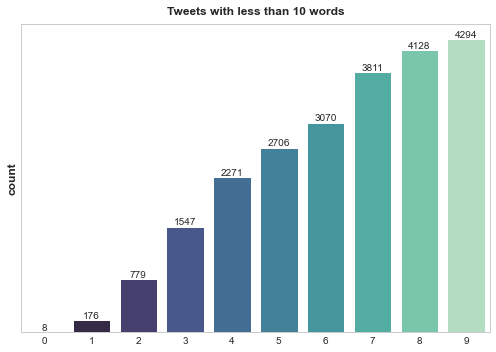

In [21]:
# check if we have removed too much text by cleaning
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

df['text_len'] = text_len

#Plot tweets with less than 10 words
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

As we can see, some of cleaned tweets have very few words: this is due to the cleaning performed before. This means that some tweets contained only mentions, hashtags and links,which have been removed. We will drop the empty tweets and also those with less than 4 words.

In [22]:
df = df[df['text_len'] > 4]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115219 entries, 3252151371 to 182653958
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   username        115219 non-null  object        
 1   acctdesc        105961 non-null  object        
 2   location        115219 non-null  object        
 3   following       115219 non-null  int64         
 4   followers       115219 non-null  int64         
 5   totaltweets     115219 non-null  int64         
 6   usercreatedts   115219 non-null  object        
 7   tweetid         115219 non-null  float64       
 8   tweetcreatedts  115219 non-null  datetime64[ns]
 9   retweetcount    115219 non-null  int64         
 10  text            115219 non-null  object        
 11  hashtags        115219 non-null  object        
 12  language        115219 non-null  object        
 13  coordinates     60 non-null      object        
 14  favorite_count  115219 n

So we have ~115k cleaned tweets left. 

Lets create some Wordclouds of the cleand text

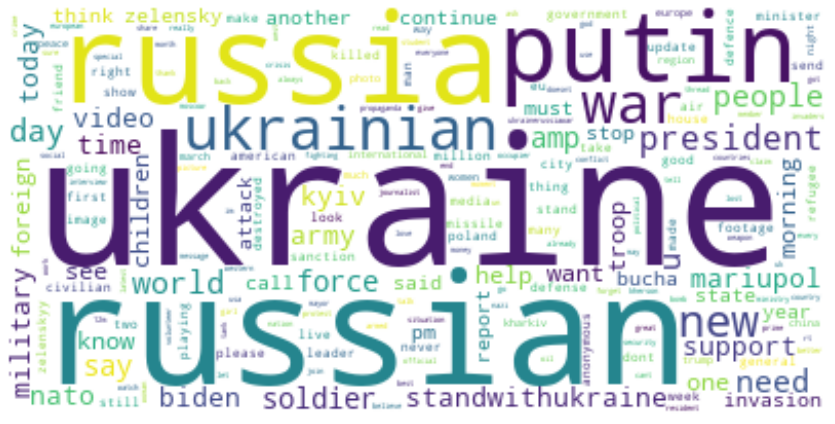

In [23]:
#Creating the text variable
text = " ".join(cat.split()[1] for cat in df.text_clean)
# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
#most common words
import plotly.express as px
from collections import Counter
temp = df['text_clean'].apply(lambda x:str(x).split())
top = Counter([item for sublist in temp for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['text','count']
temp.style.background_gradient(cmap='Blues')

fig = px.bar(temp, x="count", y="text", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='text')
fig.show()

In [25]:
#treemap of common words
fig = px.treemap(temp, path=['text'], values='count',title='Tree of Most Common Words')
fig.show()

We can see the cleaning was successful. The most common words look way different than before and like this we can focus on the true sentiment of the tweet without noise.

# Sentiment Analysis
Here we start with the Sentiment Analysis. We will be using a pretrained algorithm (roBERTa).

In [26]:
#sentiment prep
sentiment_df = df[['tweetid', 'text_clean', 'hashtags','tweetcreatedts','location','language']] # Filtering relevant Columns
sentiment_df.rename(columns = {'text_clean':'text'}, inplace = True)
sentiment_df = sentiment_df.loc[sentiment_df['language'] == 'en'].reset_index(drop=True)  # Filtering language
sentiment_df['hashtags'] = sentiment_df.hashtags.map(lambda x: [i['text'] for i in eval(x)])  # Keeping only hashtags
sentiment_df.head()

tweetid                                               text  \
0  1.509518e+18  ukraine russian losses trostianets sumy oblast...   
1  1.509320e+18  germany soon supply ukraine arms worth 300 mil...   
2  1.509631e+18   wrote donbas front russias invasion ukraine t...   
3  1.509342e+18  alpha 1 ukrainian foreign legion team multinat...   
4  1.509662e+18  countries refugees ukraine go numbers portugal...   

                                            hashtags      tweetcreatedts  \
0                                    [Ukraine, Sumy] 2022-03-31 13:10:21   
1                                 [Germany, Ukraine] 2022-03-31 00:03:16   
2                          [Donbas, Russia, Ukraine] 2022-03-31 20:38:14   
3  [StopRussianAggression, stopputin, stoprussia,... 2022-03-31 01:28:29   
4  [Refugees, Ukraine, Portugal, Россия, Ελλαδα, ... 2022-03-31 22:41:15   

                        location language  
0  Asylum Roud. Derry. N.IRELAND       en  
1                      Stockholm       en  
2         Severodonetsk, Ukraine       en  
3                     Olympia WA       en  
4                         London       en

In [28]:
import torch
!pip install transformers
import transformers

device = "cuda:0" if torch.cuda.is_available() else "cpu"

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment").to(device)

In [29]:
import urllib
import csv
labels=[]
task = 'sentiment'
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [ ]:
from scipy.special import softmax
BATCH_SIZE = 10

scores_all = np.empty((0,len(labels)))
text_all = sentiment_df['text'].to_list()
n = len(text_all)
with torch.no_grad():
    for start_idx in range(0, n, BATCH_SIZE):
        end_idx = min(start_idx + BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, truncation=True).to(
            device)
        output = model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores
        torch.cuda.empty_cache()

sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [27]:
sentiment_df.head()

tweetid                                               text  \
0  1.509518e+18  ukraine russian losses trostianets sumy oblast...   
1  1.509320e+18  germany soon supply ukraine arms worth 300 mil...   
2  1.509631e+18   wrote donbas front russias invasion ukraine t...   
3  1.509342e+18  alpha 1 ukrainian foreign legion team multinat...   
4  1.509662e+18  countries refugees ukraine go numbers portugal...   

                                            hashtags      tweetcreatedts  \
0                                    [Ukraine, Sumy] 2022-03-31 13:10:21   
1                                 [Germany, Ukraine] 2022-03-31 00:03:16   
2                          [Donbas, Russia, Ukraine] 2022-03-31 20:38:14   
3  [StopRussianAggression, stopputin, stoprussia,... 2022-03-31 01:28:29   
4  [Refugees, Ukraine, Portugal, Россия, Ελλαδα, ... 2022-03-31 22:41:15   

                        location language  
0  Asylum Roud. Derry. N.IRELAND       en  
1                      Stockholm       en  
2         Severodonetsk, Ukraine       en  
3                     Olympia WA       en  
4                         London       en

Sentiment Analysis is done. Now we have to translate it.
The most probable prediction in percent will be translated into text (negative,neutral,positive).

In [28]:
sentiment_df.insert(6, "Sentiment", '')
for i in range(len(sentiment_df)):
  if sentiment_df['negative'][i] > sentiment_df['positive'][i] and sentiment_df['negative'][i] > sentiment_df['neutral'][i]:
    sentiment_df['Sentiment'][i]='negative'
  elif sentiment_df['positive'][i] > sentiment_df['negative'][i] and sentiment_df['positive'][i] > sentiment_df['neutral'][i]:
    sentiment_df['Sentiment'][i]='positive'
  else:
    sentiment_df['Sentiment'][i]='neutral'


In [29]:
sentiment_df.head()

tweetid                                               text  \
0  1.508290e+18          theyre laughing florida dontsaygay oscars   
1  1.508370e+18  ukrainian serviceman walks outside regional ad...   
2  1.508530e+18  new talks kyiv moscow set open even sides down...   
3  1.508270e+18  big war update two russian battalions north ky...   
4  1.508500e+18   azovites abandoned base mariupol firing behin...   

                   hashtags      tweetcreatedts                 location  \
0      [DontSayGay, Oscars] 2022-03-28 04:02:00    Somewhere over yonder   
1                 [Russian] 2022-03-28 08:57:00            Kyiv, Ukraine   
2            [Kyiv, Moscow] 2022-03-28 19:30:00           El Segundo, CA   
3  [Russian, Kyiv, Belarus] 2022-03-28 02:18:00   None of your business    
4                [Mariupol] 2022-03-28 17:37:00  England, United Kingdom   

  language Sentiment  negative   neutral  positive  
0       en   neutral  0.257760  0.604801  0.137438  
1       en  negative  0.555898  0.432737  0.011365  
2       en   neutral  0.097885  0.860527  0.041588  
3       en  negative  0.502090  0.477242  0.020668  
4       en  negative  0.658368  0.334271  0.007361

Lets quickly plot the overall Sentiment distribution.

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

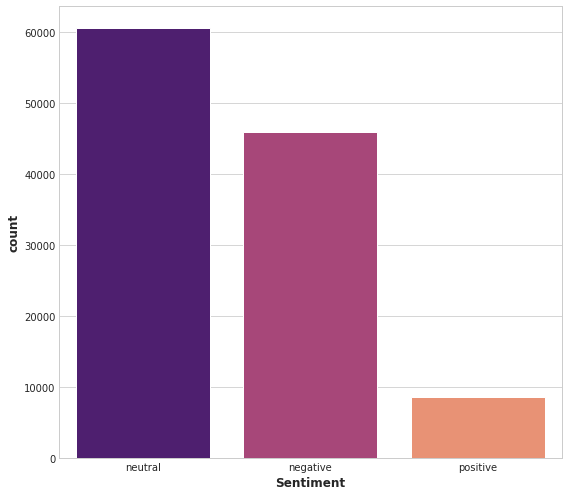

In [30]:
#plot
plt.figure(figsize = (8,7))
sns.countplot(x="Sentiment", data=sentiment_df, palette='magma')

**WordClouds** for Negative, Neutral and Positive Sentiments

In [31]:
tweet_neg = sentiment_df.loc[sentiment_df['Sentiment'] == 'negative'].reset_index(drop=True)
tweet_net = sentiment_df.loc[sentiment_df['Sentiment'] == 'neutral'].reset_index(drop=True)
tweet_pos = sentiment_df.loc[sentiment_df['Sentiment'] == 'positive'].reset_index(drop=True)

**Negative Sentiment**

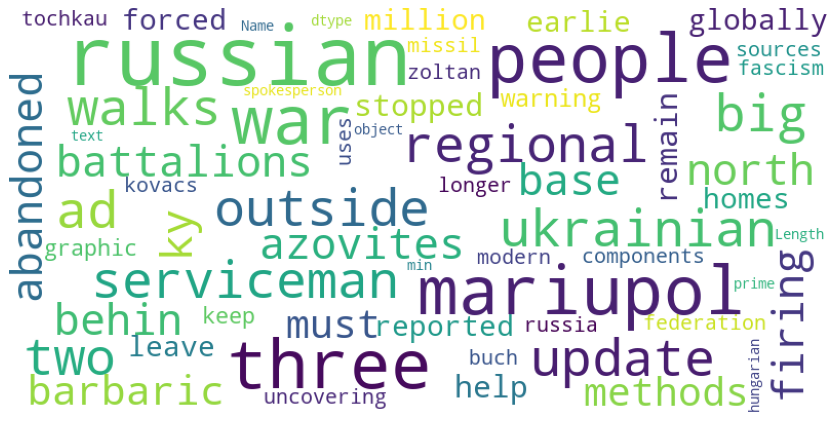

In [32]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(tweet_neg['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Neutral Sentiment**

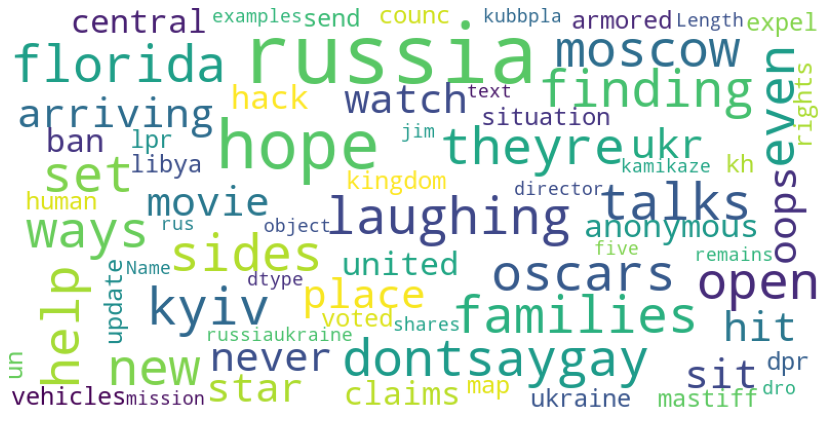

In [33]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(tweet_net['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Positive Sentiment**

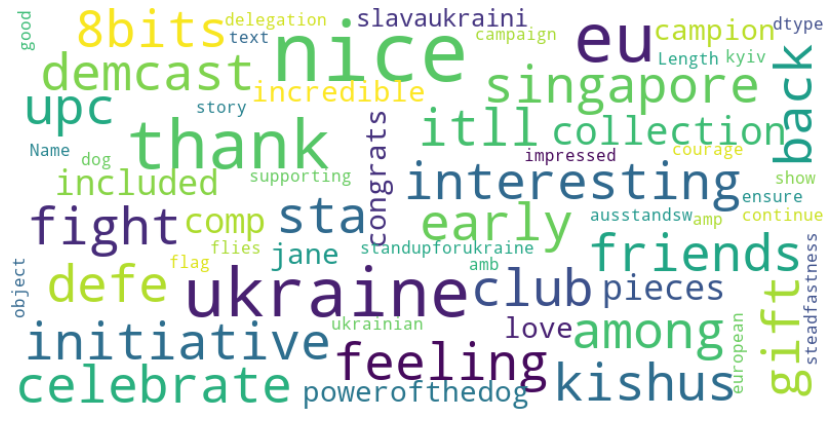

In [34]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(tweet_pos['text']))

print(wordcloud)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
#Sorting And Feature Engineering
f_data = sentiment_df.sort_values(by='tweetcreatedts')
ft_data=f_data.copy()
ft_data['date'] = pd.to_datetime(f_data['tweetcreatedts'],errors='coerce').dt.date

ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month%12 // 3 + 1

ft_data.head()

tweetid                                               text  \
11961  1.497725e+18  president zelensky reportedly declined offers ...   
10061  1.497725e+18  dear ukrainians take photos post twitter elsew...   
10457  1.497725e+18  gas pipeline bursting kharkiv ukraine stopruss...   
11379  1.497725e+18  ukraine army treats russian captured soldier t...   
9830   1.497725e+18  ukraine army treats russian captured soldier t...   

                                        hashtags      tweetcreatedts  \
11961                                         [] 2022-02-27 00:07:19   
10061                                         [] 2022-02-27 00:07:23   
10457  [Kharkiv, ukraine, StopRussia, StopPutin] 2022-02-27 00:07:29   
11379                                         [] 2022-02-27 00:07:38   
9830                                          [] 2022-02-27 00:07:38   

                        location language Sentiment  negative   neutral  \
11961                     London       en   neutral  0.422551  0.562111   
10061  Toronto, Ontario, Canada        en   neutral  0.141787  0.793200   
10457                        広島        en   neutral  0.296707  0.676842   
11379            Oxford, England       en  negative  0.644645  0.324805   
9830             Oxford, England       en  negative  0.644645  0.324805   

       positive        date  year  month  day  day_of_year  quarter  season  
11961  0.015338  2022-02-27  2022      2   27           58        1       1  
10061  0.065013  2022-02-27  2022      2   27           58        1       1  
10457  0.026451  2022-02-27  2022      2   27           58        1       1  
11379  0.030550  2022-02-27  2022      2   27           58        1       1  
9830   0.030550  2022-02-27  2022      2   27           58        1       1

Below Plot shows the overall sentiment by day. 
It also includes the daily average and some peaks.

In [36]:
#daily average
b_date_mean = ft_data.groupby(by='date').mean().reset_index()
b_date_std = ft_data.groupby(by='date').std().reset_index()
import plotly.graph_objs as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=('Daily Average Positive Sentiment', 'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['positive'], name='Positive Sentiment Mean'),
    row=1, col=1
)

# positive mean
fig.add_shape(type="line",
              x0=b_date_mean['date'].values[0], y0=b_date_mean['positive'].mean(),
              x1=b_date_mean['date'].values[-1], y1=b_date_mean['positive'].mean(),
              line=dict(
                  color="Red",
                  width=2,
                  dash="dashdot",
              ),
              name='Mean'
              )

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['positive'].mean(),
                   text=r"$\mu : {:.2f}$".format(b_date_mean['positive'].mean()),
                   showarrow=True,
                   arrowhead=3,
                   yshift=10)

fig.add_annotation(x=b_date_mean['date'].values[9], y=.165,
            text=r"Mar 8th",
            showarrow=True,
            arrowhead=3,
            yshift=10)

fig.add_annotation(x=b_date_mean['date'].values[18], y=.148,
            text=r"Mar 17th",
            showarrow=True,
            arrowhead=3,
            yshift=10)


fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['negative'], name='Negative Sentiment Mean'),
    row=2, col=1
)

# negative mean
fig.add_shape(type="line",
              x0=b_date_mean['date'].values[0], y0=b_date_mean['negative'].mean(),
              x1=b_date_mean['date'].values[-1], y1=b_date_mean['negative'].mean(),
              line=dict(
                  color="Red",
                  width=2,
                  dash="dashdot",
              ),
              name='Mean',
              xref='x2',
              yref='y2'
              )

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['negative'].mean(),
                   text=r"$\mu : {:.2f}$".format(b_date_mean['negative'].mean()),
                   showarrow=True,
                   arrowhead=3,
                   yshift=10,
                   xref='x2',
                   yref='y2')

fig.add_annotation(x=b_date_mean['date'].values[22], y=.43,
            text=r"Mar 21th",
            showarrow=True,
            arrowhead=3,
            yshift=10,
            xref='x2', 
            yref='y2')

fig.add_annotation(x=b_date_mean['date'].values[35], y=.51,
            text=r"Apr 3rd",
            showarrow=True,
            arrowhead=3,
            yshift=10,
            xref='x2', 
            yref='y2')



fig.update_layout(title_text="Sentiment Average Change With Time")
fig.show()

Lets use a barplot to compare the daily sentiments.

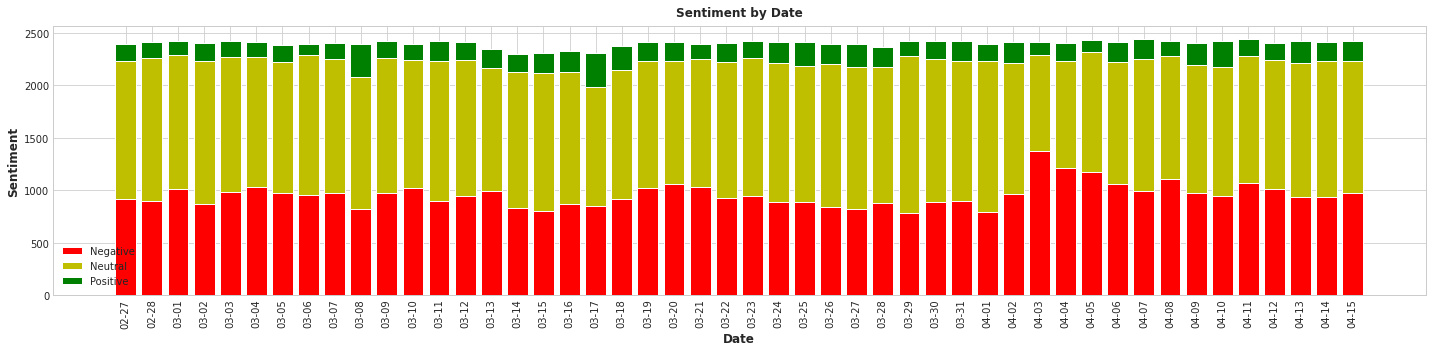

In [37]:
#Sentiment per Day
ft_data['date'] = pd.to_datetime(ft_data['date'])
df2 = pd.crosstab(ft_data.date,ft_data.Sentiment)
df3 = df2.reset_index()
df3['date'] = df3['date'].dt.strftime('%m-%d')

# plot data in stack manner of bar type
plt.figure(figsize=(20,5))
plt.bar(df3['date'], df3['negative'], color='r')
plt.bar(df3['date'], df3['neutral'], bottom=df3['negative'], color='y')
plt.bar(df3['date'], df3['positive'], bottom=df3['negative']+df3['neutral'], color='g')

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.legend(["Negative", "Neutral", "Positive"])
plt.title("Sentiment by Date")
plt.show()

In [38]:
ft_data.info()
ft_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115201 entries, 11961 to 105198
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tweetid         115201 non-null  float64       
 1   text            115201 non-null  object        
 2   hashtags        115201 non-null  object        
 3   tweetcreatedts  115201 non-null  datetime64[ns]
 4   location        115201 non-null  object        
 5   language        115201 non-null  object        
 6   Sentiment       115201 non-null  object        
 7   negative        115201 non-null  float64       
 8   neutral         115201 non-null  float64       
 9   positive        115201 non-null  float64       
 10  date            115201 non-null  datetime64[ns]
 11  year            115201 non-null  int64         
 12  month           115201 non-null  int64         
 13  day             115201 non-null  int64         
 14  day_of_year     115201 non-null 

tweetid                                               text  \
11961  1.497725e+18  president zelensky reportedly declined offers ...   
10061  1.497725e+18  dear ukrainians take photos post twitter elsew...   
10457  1.497725e+18  gas pipeline bursting kharkiv ukraine stopruss...   
11379  1.497725e+18  ukraine army treats russian captured soldier t...   
9830   1.497725e+18  ukraine army treats russian captured soldier t...   

                                        hashtags      tweetcreatedts  \
11961                                         [] 2022-02-27 00:07:19   
10061                                         [] 2022-02-27 00:07:23   
10457  [Kharkiv, ukraine, StopRussia, StopPutin] 2022-02-27 00:07:29   
11379                                         [] 2022-02-27 00:07:38   
9830                                          [] 2022-02-27 00:07:38   

                        location language Sentiment  negative   neutral  \
11961                     London       en   neutral  0.422551  0.562111   
10061  Toronto, Ontario, Canada        en   neutral  0.141787  0.793200   
10457                        広島        en   neutral  0.296707  0.676842   
11379            Oxford, England       en  negative  0.644645  0.324805   
9830             Oxford, England       en  negative  0.644645  0.324805   

       positive       date  year  month  day  day_of_year  quarter  season  
11961  0.015338 2022-02-27  2022      2   27           58        1       1  
10061  0.065013 2022-02-27  2022      2   27           58        1       1  
10457  0.026451 2022-02-27  2022      2   27           58        1       1  
11379  0.030550 2022-02-27  2022      2   27           58        1       1  
9830   0.030550 2022-02-27  2022      2   27           58        1       1

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129521 (\N{BRICK}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127465 (\N{REGIONAL INDICATOR SYMBOL LETTER D}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129293 (\U0001f90d) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12775

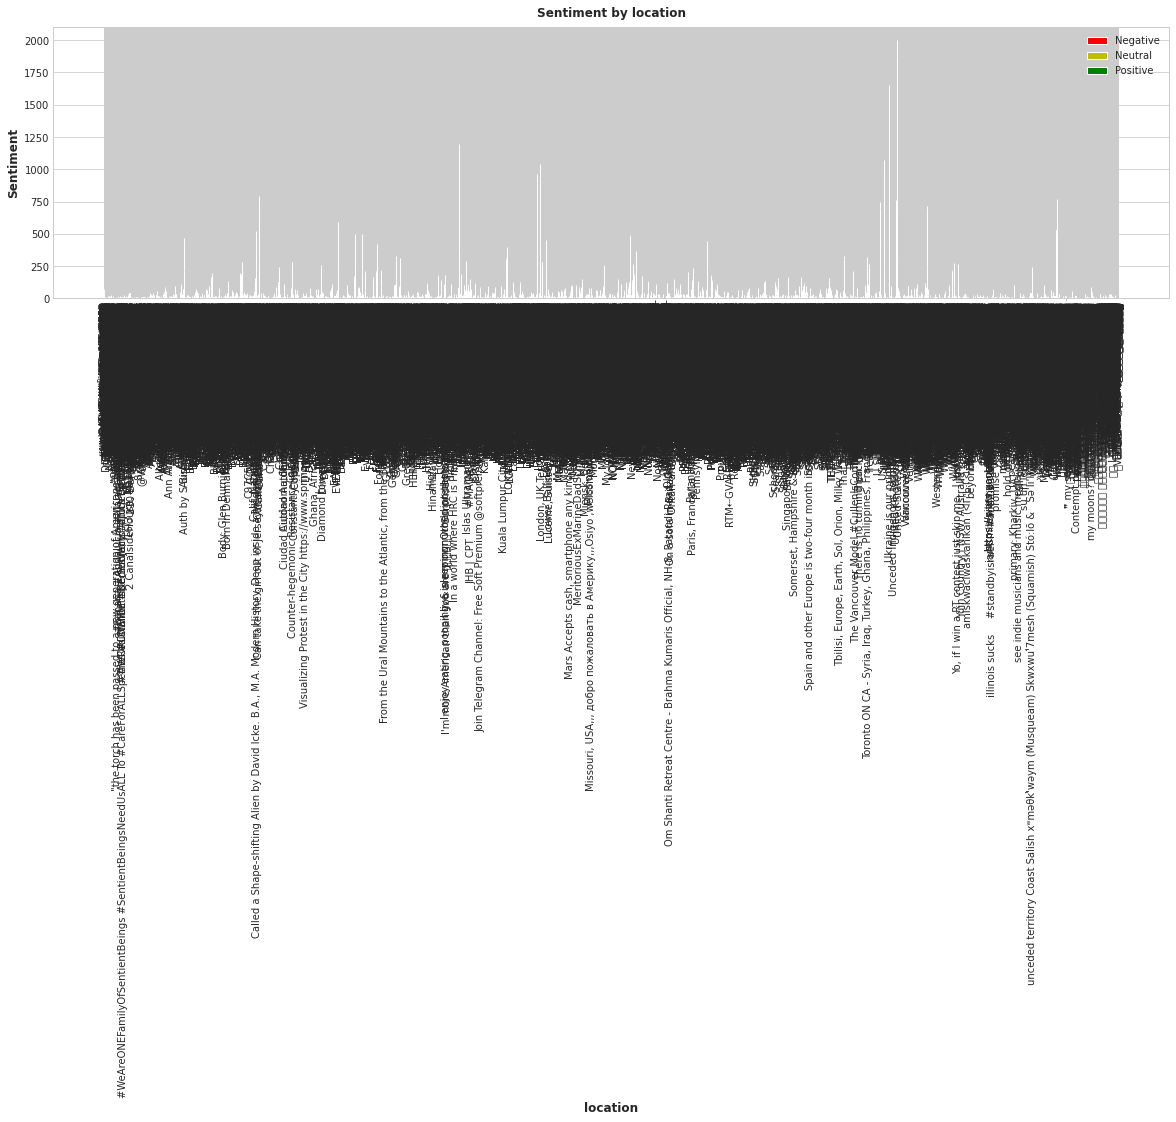

In [39]:
df2 = pd.crosstab(ft_data.location,ft_data.Sentiment)
df3 = df2.reset_index()

# plot data in stack manner of bar type
plt.figure(figsize=(20,5))
plt.bar(df3['location'], df3['negative'], color='r')
plt.bar(df3['location'], df3['neutral'], bottom=df3['negative'], color='y')
plt.bar(df3['location'], df3['positive'], bottom=df3['negative']+df3['neutral'], color='g')

plt.xticks(rotation=90)
plt.xlabel("location")
plt.ylabel("Sentiment")
plt.legend(["Negative", "Neutral", "Positive"])
plt.title("Sentiment by location")
plt.show()

# Emotion Analysis
Here we start with the Emotion Analysis. We will also be using the pretrained roBERTa algorithm.

In [40]:
emotion_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
emotion_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion").to(device)

task='emotion'
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

BATCH_SIZE = 10

scores_all = np.empty((0,len(labels)))
text_all = sentiment_df['text'].to_list()
n = len(text_all)
with torch.no_grad():
    for start_idx in range(0, n, BATCH_SIZE):
        end_idx = min(start_idx+BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, truncation=True).to(device)
        output = emotion_model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores
        torch.cuda.empty_cache()
    

sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)

Downloading:   0%|          | 0.00/768 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [41]:
sentiment_df[labels]

anger       joy  optimism   sadness
0       0.052267  0.903261  0.016222  0.028250
1       0.807112  0.008757  0.025774  0.158357
2       0.234604  0.044950  0.208254  0.512192
3       0.640528  0.036355  0.031147  0.291970
4       0.854697  0.017078  0.024579  0.103646
...          ...       ...       ...       ...
115196  0.772829  0.010998  0.066576  0.149596
115197  0.952288  0.005397  0.019289  0.023026
115198  0.181789  0.146998  0.593699  0.077514
115199  0.938334  0.009778  0.014923  0.036965
115200  0.804340  0.015465  0.029281  0.150915

[115201 rows x 4 columns]

Making a new datset with emotion rather than the score of the emotions.

In [42]:
emotion_df = sentiment_df
emotion_df.drop(['negative','positive','neutral','language'], axis=1, inplace=True)


In [43]:
emotion_df.insert(6, "Emotion", '')
for i in range(len(emotion_df)):
  if emotion_df['anger'][i] > emotion_df['joy'][i] and emotion_df['anger'][i] > emotion_df['optimism'][i] and emotion_df['anger'][i] > emotion_df['sadness'][i]:
    emotion_df['Emotion'][i] = 'anger'
  elif emotion_df['joy'][i] > emotion_df['anger'][i] and emotion_df['joy'][i] > emotion_df['optimism'][i] and emotion_df['joy'][i] > emotion_df['sadness'][i]:
    emotion_df['Emotion'][i]= 'joy'
  elif emotion_df['optimism'][i] > emotion_df['anger'][i] and emotion_df['optimism'][i] > emotion_df['joy'][i] and emotion_df['optimism'][i] > emotion_df['sadness'][i]:
    emotion_df['Emotion'][i]= 'optimism'
  else:
    emotion_df['Emotion'][i] = 'sadness'

Lets quickly plot the overall Emotion distribution.

<AxesSubplot:xlabel='Emotion', ylabel='count'>

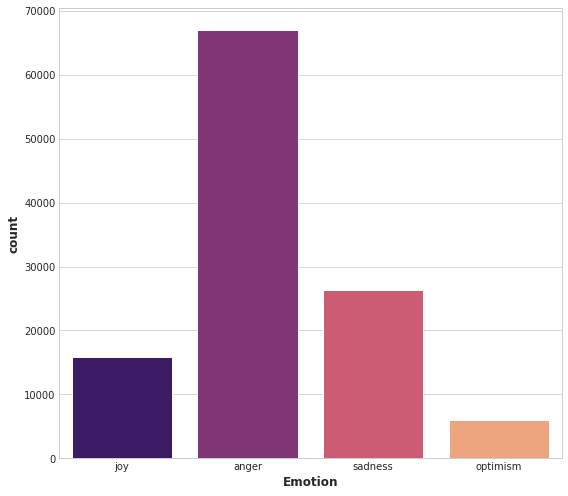

In [44]:
plt.figure(figsize = (8,7))
sns.countplot(x="Emotion", data=emotion_df, palette='magma')

**Wordcloud** for Anger, Joy, Optimism, Sadness

In [45]:
emotion_anger = emotion_df.loc[emotion_df['Emotion'] == 'anger'].reset_index(drop=True)
emotion_joy = emotion_df.loc[emotion_df['Emotion'] == 'joy'].reset_index(drop=True)
emotion_opt = emotion_df.loc[emotion_df['Emotion'] == 'optimism'].reset_index(drop=True)
emotion_sad = emotion_df.loc[emotion_df['Emotion'] == 'sadness'].reset_index(drop=True)

**Anger**


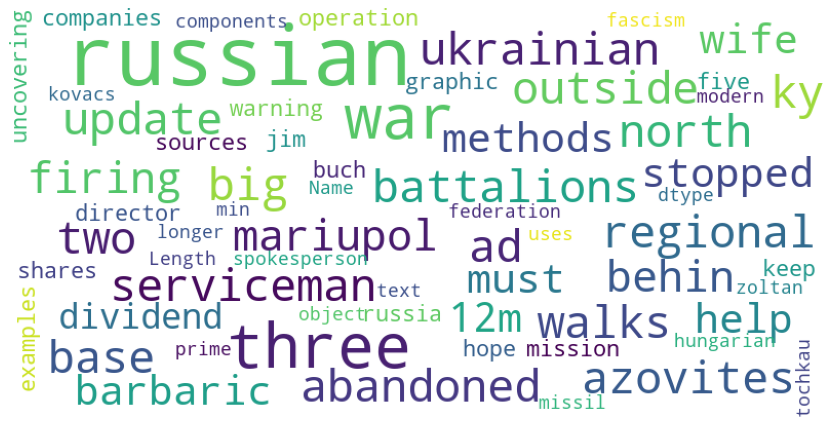

In [46]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(emotion_anger['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Joy**

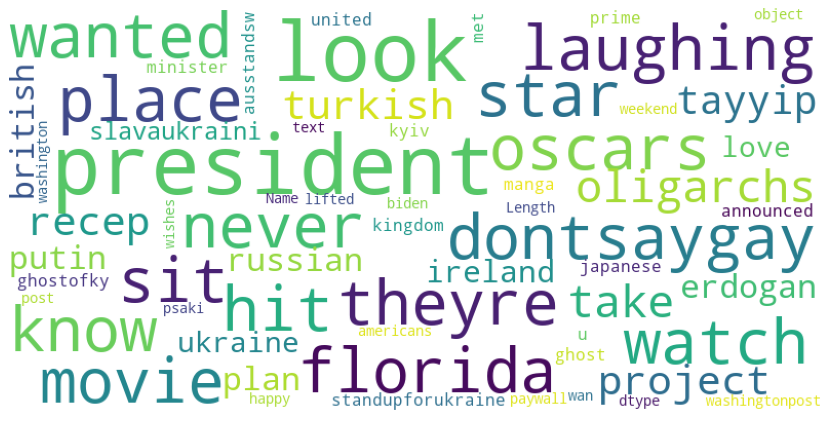

In [47]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(emotion_joy['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Optimism**

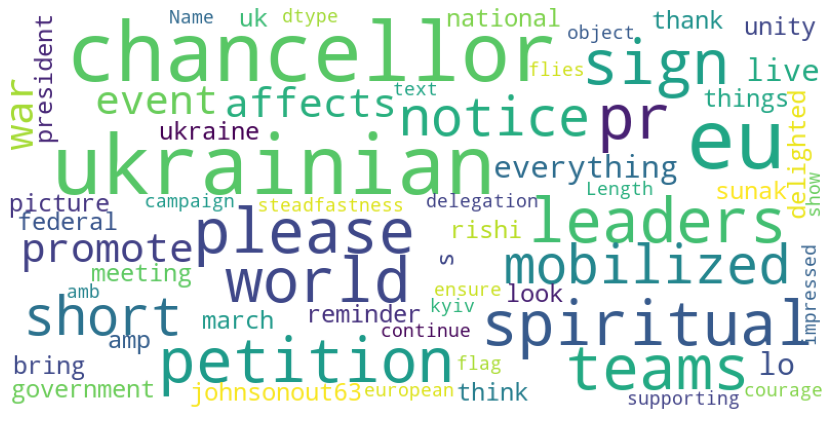

In [48]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(emotion_opt['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Sadness**

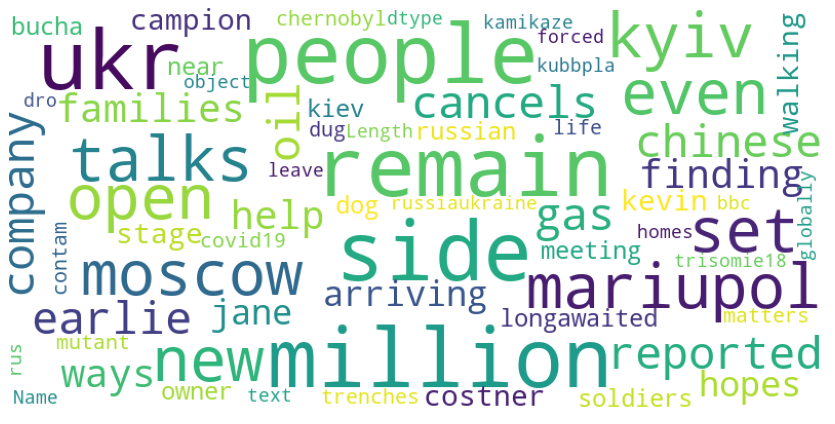

In [49]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(emotion_sad['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [50]:
#Sorting And Feature Engineering
f_data = emotion_df.sort_values(by='tweetcreatedts')
ft_data=f_data.copy()
ft_data['date'] = pd.to_datetime(f_data['tweetcreatedts'],errors='coerce').dt.date

ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month%12 // 3 + 1

ft_data.head()

tweetid                                               text  \
11961  1.497725e+18  president zelensky reportedly declined offers ...   
10061  1.497725e+18  dear ukrainians take photos post twitter elsew...   
10457  1.497725e+18  gas pipeline bursting kharkiv ukraine stopruss...   
11379  1.497725e+18  ukraine army treats russian captured soldier t...   
9830   1.497725e+18  ukraine army treats russian captured soldier t...   

                                        hashtags      tweetcreatedts  \
11961                                         [] 2022-02-27 00:07:19   
10061                                         [] 2022-02-27 00:07:23   
10457  [Kharkiv, ukraine, StopRussia, StopPutin] 2022-02-27 00:07:29   
11379                                         [] 2022-02-27 00:07:38   
9830                                          [] 2022-02-27 00:07:38   

                        location Sentiment  Emotion     anger       joy  \
11961                     London   neutral  sadness  0.253126  0.025477   
10061  Toronto, Ontario, Canada    neutral    anger  0.440719  0.026523   
10457                        広島    neutral    anger  0.707511  0.034262   
11379            Oxford, England  negative    anger  0.597553  0.034275   
9830             Oxford, England  negative    anger  0.597553  0.034275   

       optimism   sadness        date  year  month  day  day_of_year  quarter  \
11961  0.063084  0.658313  2022-02-27  2022      2   27           58        1   
10061  0.092256  0.440501  2022-02-27  2022      2   27           58        1   
10457  0.028727  0.229501  2022-02-27  2022      2   27           58        1   
11379  0.012757  0.355415  2022-02-27  2022      2   27           58        1   
9830   0.012757  0.355415  2022-02-27  2022      2   27           58        1   

       season  
11961       1  
10061       1  
10457       1  
11379       1  
9830        1

Below Plot shows the overall Emotion by day. 

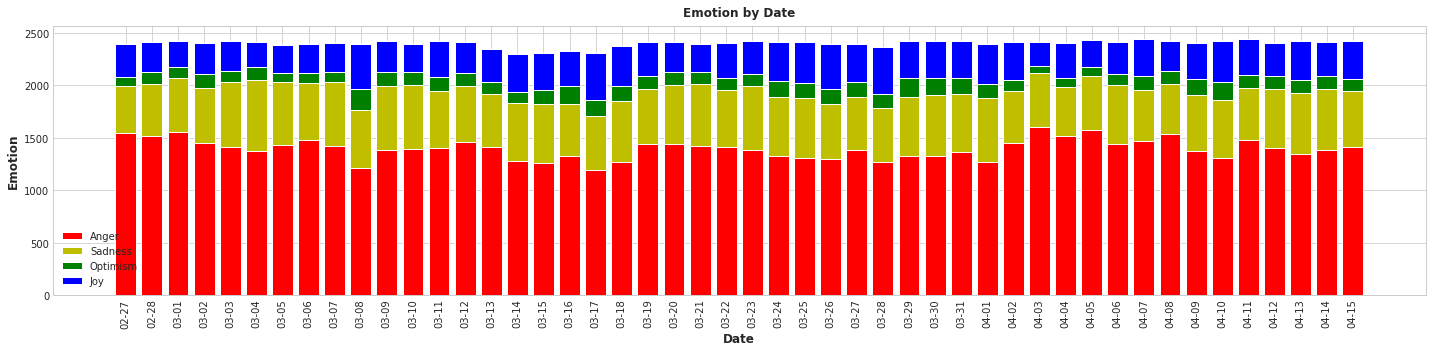

In [51]:
#Emotion per Day
ft_data['date'] = pd.to_datetime(ft_data['date'])
df2 = pd.crosstab(ft_data.date,ft_data.Emotion)
df3 = df2.reset_index()
df3['date'] = df3['date'].dt.strftime('%m-%d')

# plot data in stack manner of bar type
plt.figure(figsize=(20,5))
plt.bar(df3['date'], df3['anger'], color='r')
plt.bar(df3['date'], df3['sadness'], bottom=df3['anger'], color='y')
plt.bar(df3['date'], df3['optimism'], bottom=df3['anger']+df3['sadness'], color='g')
plt.bar(df3['date'], df3['joy'], bottom=df3['anger']+df3['sadness']+df3['optimism'], color='blue')
#joy

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Emotion")
plt.legend(["Anger", "Sadness", "Optimism", "Joy"])
plt.title("Emotion by Date")
plt.show()


# Conclusion
Based on the sentiment analysis done, we learned that;
* The dominant sentiment is neutral
* The dominant emotion is anger

